<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
### <font color='blue'>Modelagem de Séries Temporais e Real-Time Analytics com Apache Spark e Databricks</font>
### <font color='blue'>Projeto 1 - Tarefa 1</font>
### <font color='blue'>Prevendo Usuários Ativos em Um Web Site</font>

Leia o material sobre o Processo de Análise de Séries Temporais no Capítulo 4 do curso.

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Formatação para os gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Formatando os labels dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando e Explorando os Dados

In [6]:
# Carregando os dados
dados = pd.read_csv('dataset.csv', header = None)

In [7]:
# Visualizando os Dados
dados.head()

,0,1
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória (usuarios_ativos) e a data, que representa o índice da série. Veja que a série é mensal.

Vamos ajustar o nome de cada coluna.

In [8]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'usuarios_ativos']

In [9]:
# Visualizando os Dados
dados.head()

,mes,usuarios_ativos
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [10]:
# Shape dos Dados
dados.shape

(144, 2)

In [11]:
# Tipos dos Dados
dados.dtypes

mes                object
usuarios_ativos     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [12]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

In [13]:
# Resumo estatístico da variável usuarios_ativos. A média é de 280.
dados.describe()

,usuarios_ativos
count,144.000000
mean,280.416667
std,119.825543
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [14]:
# Qual será o mês com o maior número de usuários ativos?
dados.max()

mes                2024-12
usuarios_ativos        622
dtype: object

In [15]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 2013-01
Final do Período de Tempo: 2024-12


## Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [16]:
# Visualizando os Dados
dados.head()

,mes,usuarios_ativos
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [17]:
# Tipos dos Dados
dados.dtypes

mes                object
usuarios_ativos     int64
dtype: object

In [18]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [19]:
# Tipos dos Dados
dados.dtypes

mes                datetime64[ns]
usuarios_ativos             int64
dtype: object

In [20]:
# Visualizando os Dados
dados.head()

,mes,usuarios_ativos
0,2013-01-01,110
1,2013-02-01,121
2,2013-03-01,135
3,2013-04-01,127
4,2013-05-01,128


In [21]:
# Vamos transformar a coluna de data no índice do conjunto de dados. 
# Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [22]:
# Visualizando os Dados
dados_serie.head()

,usuarios_ativos
mes,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [23]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [24]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

usuarios_ativos    0
dtype: int64

> Plot da Série Temporal - Primeira Análise de Tendência

In [25]:
type(dados_serie)

pandas.core.frame.DataFrame

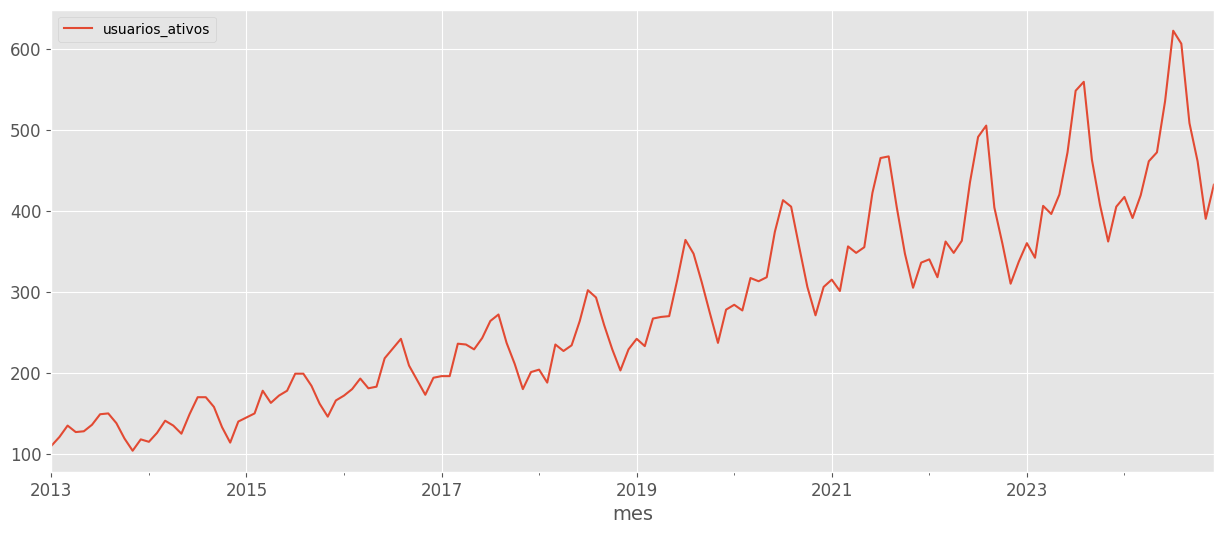

In [26]:
# Plot da Série Temporal - aqui já observamos algumas tendências
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência. 

- Sazonalidade - O fenômeno se repete em períodos fixos.
- Tendência - Ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Mas, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.


> Gráfico de Densidade - Segunda Análise de Tendência

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico: 

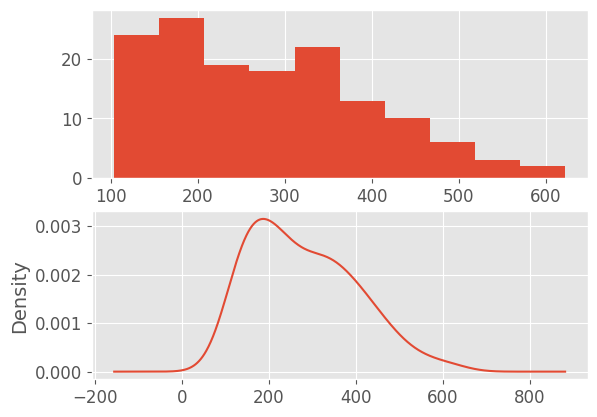

In [27]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.usuarios_ativos.hist()

# Subplot 2
plt.subplot(212)
dados_serie.usuarios_ativos.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

> BoxPlots - Terceira Análise de Tendência

Vamos agora criar BoxPlots para cada ano da série.

Text(0, 0.5, '\nUsuários Ativos')

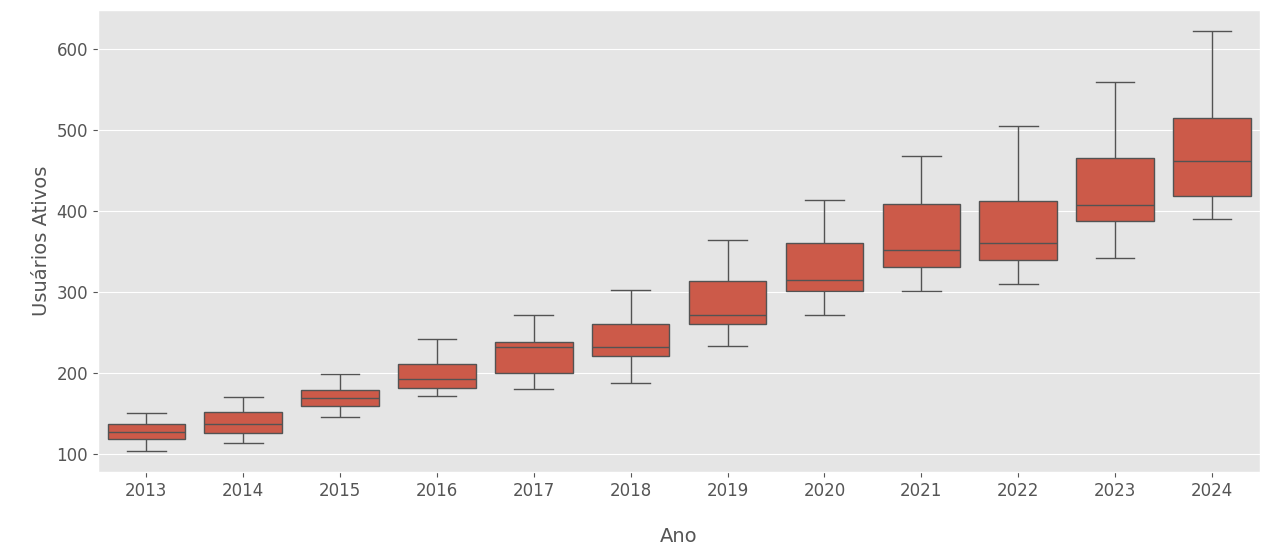

In [28]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = dados_serie.usuarios_ativos.index.year
valor = dados_serie.usuarios_ativos

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nUsuários Ativos")

Análise:

- O aumento da mediana ao longo dos anos confirma uma tendência ascendente.
- Aumento constante da dispersão ao redor da mediana dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

## Visualizando a Decomposição da Série Temporal

Vamos então decompor nossa série temporal.

In [29]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie, 
                                                        model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

In [30]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

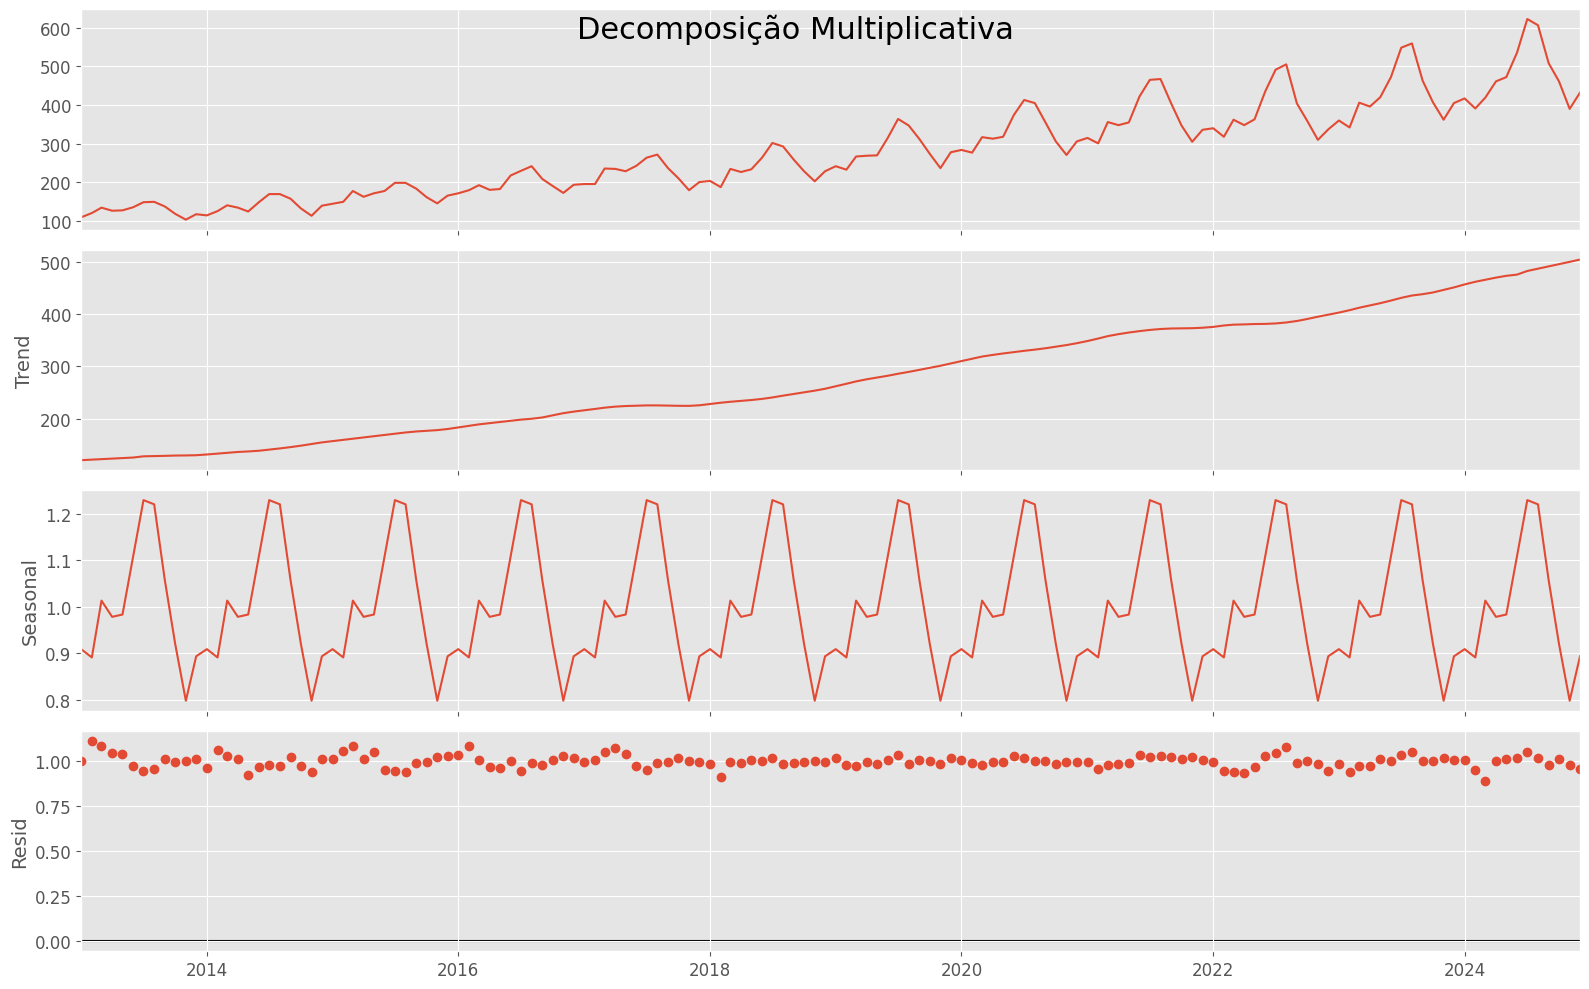

In [31]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [32]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados_serie, 
                                                 model = 'aditive', 
                                                 extrapolate_trend = 'freq')

In [33]:
# Tipo do objeto
type(decomposicao_aditiva)

statsmodels.tsa.seasonal.DecomposeResult

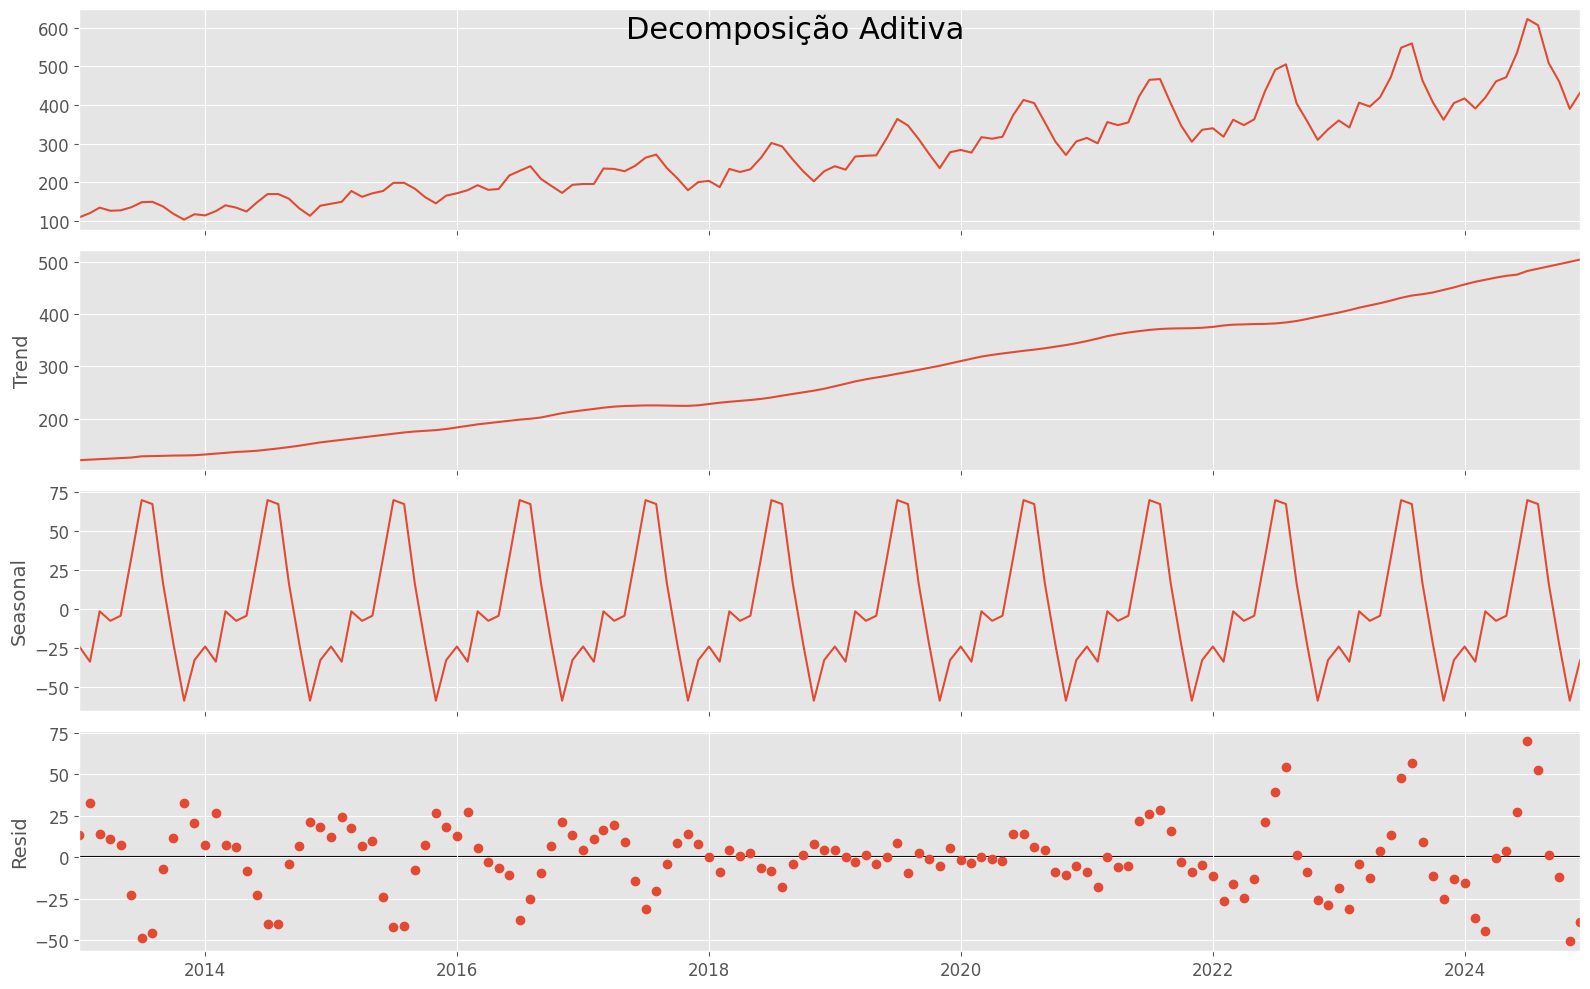

In [34]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

> Análise da Decomposição da Série

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de usuários ativos.

2- A segunda linha mostra a tendência da série, que claramente é uma tendência de crescimento, ou seja, o número de veículos produzidos tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos valores maiores ou menores do número de veículos produzidos. Isso talvez possa ser explicado por eventos baseados em calendário (verão, inverno, férias escolares, etc...).

4- A quarta linha é o componete irregular ou resíduo.

Definir **extrapolate_trend = 'freq'** remove valores NaN na tendência e nos resíduos (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. 

Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

## Extração dos Componentes da Série Temporal

Regra de extração:

**Valores Reais = (sazonal * tendência * resíduo)**

In [35]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [36]:
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [37]:
# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2013-01-01,0.908801,120.743930,1.002440,110.0
2013-02-01,0.890967,121.750194,1.115460,121.0
2013-03-01,1.013081,122.756459,1.085538,135.0
2013-04-01,0.978227,123.762723,1.048997,127.0
2013-05-01,0.983212,124.768988,1.043413,128.0


In [38]:
# Dados originais
dados_serie.head()

,usuarios_ativos
mes,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 2013-01-01 = 110.0
- Série na data 2013-01-01 = Sazonalidade x Tendência x Resíduos = 0.908801 x 120.743930 x 1.002440 = 110.0

In [39]:
# Cálculo em Python
valor_observado = np.round(0.908801 * 120.743930 * 1.002440)
print(valor_observado)

110.0


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.

Concluímos assim a primeira etapa do Projeto. Vamos para a segunda etapa.

In [40]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [41]:
#%watermark -v -m

In [42]:
#%watermark --iversions

# Fim da Tarefa 1